# Long Short-Term Memory (LSTM) 

---

## Introduction to Sequential Modeling

In deep learning, sequential data (like text, time series, or audio) needs special models that can learn patterns **over time**. Recurrent Neural Networks (RNNs) were the first to do this by **reusing neurons** across time steps.

---

## Limitations of Vanilla RNN

While RNNs are good for short sequences, they suffer from:

### 1. **Vanishing Gradient Problem**
- During backpropagation, gradients **shrink** through each time step.
- Eventually, they become **too small to update weights**, especially with long sequences.

### 2. **Exploding Gradient Problem**
- Sometimes, gradients become too large and **destabilize training**.

### 3. **Short-Term Memory**
- RNNs can only **remember a few steps back**.
- Struggles with long-term dependencies like:


---

##  Motivation for LSTM

LSTM (Long Short-Term Memory), proposed by **Hochreiter & Schmidhuber (1997)**, solves RNN limitations by introducing:
- A **cell state** (long-term memory)
- **Gates** that control what to keep/forget

---

## LSTM Architecture

Each LSTM cell has:

- **Forget Gate** ($f_t$): What information to discard
- **Input Gate** ($i_t$): What new information to store
- **Candidate Memory** ($\tilde{c}_t$): New potential content
- **Cell State** ($c_t$): Memory from past
- **Output Gate** ($o_t$): What to output from memory

---



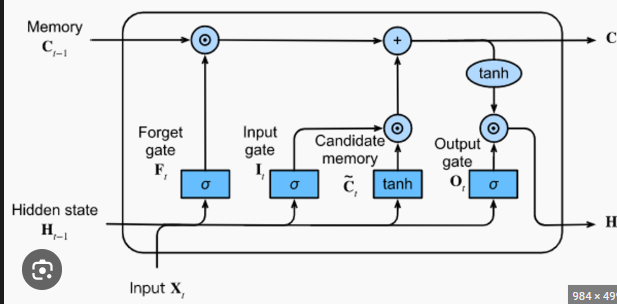


## LSTM Mathematical Formulas

Let:

- $x_t$ = input at time $t$  
- $h_{t-1}$ = hidden state from previous step  
- $c_{t-1}$ = cell state from previous step

Then,

1. **Forget Gate:**
   $$
   f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)
   $$

2. **Input Gate & Candidate:**
   $$
   i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)
   $$
   $$
   \tilde{c}_t = \tanh(W_c \cdot [h_{t-1}, x_t] + b_c)
   $$

3. **Cell State Update:**
   $$
   c_t = f_t \cdot c_{t-1} + i_t \cdot \tilde{c}_t
   $$

4. **Output Gate:**
   $$
   o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)
   $$

5. **Hidden State Update:**
   $$
   h_t = o_t \cdot \tanh(c_t)
   $$

Where:
- $\sigma$ = Sigmoid activation  
- $\tanh$ = Hyperbolic tangent activation



## When to Use LSTM

- **Text Generation**
- **Machine Translation**
- **Speech Recognition**
- **Stock Price Prediction**
- **Music Generation**

> GRU is often more **computationally efficient**, but LSTM can be more **competitive** in tasks requiring precise long-term memory control.

---

## 🔚 Summary

- **RNNs** fail at long-term memory due to the **vanishing gradient problem**.
- **LSTM** solves this using **gates** and a **cell state** to preserve information across long sequences.
- **LSTM is powerful but complex** — **GRU** is a **lighter and faster** alternative.

### ✅ Use LSTM When:
- Long sequences are important
- You need fine control over memory


# Gated Recurrent Unit (GRU) 

---

## What is GRU?

**GRU (Gated Recurrent Unit)** is a simplified version of the Long Short-Term Memory (LSTM) network.  
It was introduced in **2014** by **Cho et al.** to address some of the **complexity and inefficiency** of LSTM, while still **retaining long-term dependency learning**.

---

## Limitations of LSTM

While LSTM is powerful, it has **drawbacks**:

| Limitation              | Explanation                                                                 |
|-------------------------|-----------------------------------------------------------------------------|
| 🧮 Too Many Gates        | LSTM has 3 gates + a memory cell, making it **complex**                     |
| 🧠 More Parameters       | Increases the number of trainable weights, **slowing down training**        |
| 🐌 Slower Convergence    | Training takes longer compared to simpler models like GRU                   |
| 🧑‍🔬 Overkill for Simple Tasks | Many problems don’t require such complex memory management                |

---

## Why GRU Was Introduced

GRU was created to:

- **Simplify** the LSTM architecture  
- **Speed up training** by reducing parameters  
- Perform **just as well or better** on smaller datasets or simpler tasks  
- Combine the functionality of LSTM’s gates into fewer components

> GRU = **Fewer gates, similar performance**

---

## GRU Architecture

GRU has only **two gates**:

| Gate            | Purpose                                        |
|------------------|------------------------------------------------|
| **Update Gate ($z_t$)** | Decides how much of the past to keep             |
| **Reset Gate ($r_t$)**  | Decides how much of the past to forget           |

Unlike LSTM, GRU **merges the hidden and cell state** into **one**.

---




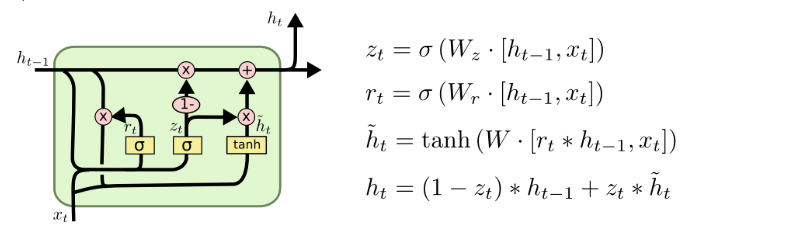
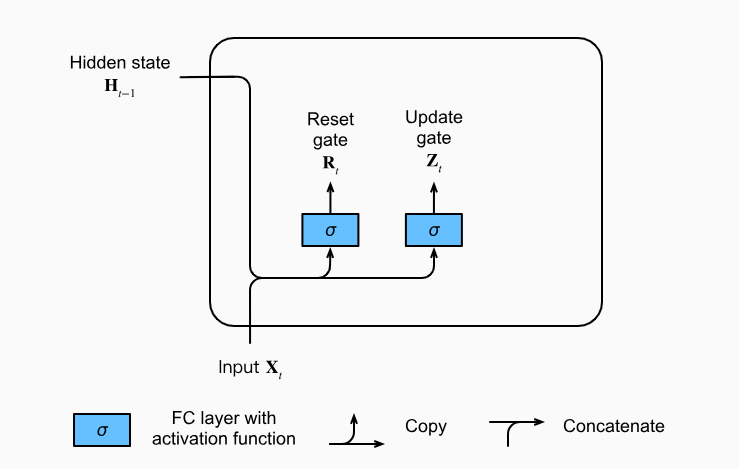


## GRU Mathematical Formulas

Let:

- $x_t$ = input at time $t$
- $h_{t-1}$ = previous hidden state

Then:

1. **Update Gate:**
   $$
   z_t = \sigma(W_z \cdot [h_{t-1}, x_t] + b_z)
   $$

2. **Reset Gate:**
   $$
   r_t = \sigma(W_r \cdot [h_{t-1}, x_t] + b_r)
   $$

3. **Candidate Hidden State:**
   $$
   \tilde{h}_t = \tanh(W_h \cdot [r_t * h_{t-1}, x_t] + b_h)
   $$

4. **Final Hidden State:**
   $$
   h_t = (1 - z_t) * h_{t-1} + z_t * \tilde{h}_t
   $$


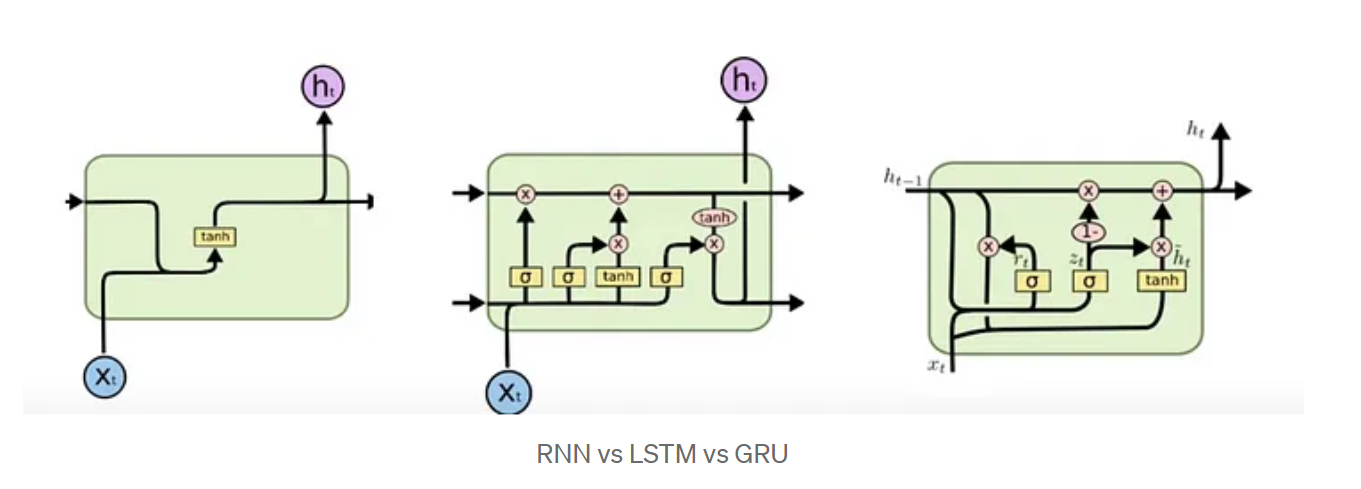